**1. Data Extraction & Visualization: Kenya's Electricity Generation & Demand**

In [2]:
import pandas as pd

In [3]:
generation_df = pd.read_csv(r'C:\Users\pc\Documents\Projects\Energy-Access-and-Electrification-planning\data\electricity_generation_data\electricity-generation.csv')
generation_df 

,Entity,Code,Year,Electricity generation - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56
...,...,...,...,...
7407,Zimbabwe,ZWE,2018,9.44
7408,Zimbabwe,ZWE,2019,8.49
7409,Zimbabwe,ZWE,2020,6.71
7410,Zimbabwe,ZWE,2021,8.46


In [ ]:
# Extract Kenya's electricity generation data from generation_df
kenya_generation_df = generation_df[generation_df['Entity'] == 'Kenya'].reset_index(drop=True)
kenya_generation_df.head()

,Entity,Code,Year,Electricity generation - TWh
0,Kenya,KEN,2000,4.31
1,Kenya,KEN,2001,4.81
2,Kenya,KEN,2002,5.15
3,Kenya,KEN,2003,5.48
4,Kenya,KEN,2004,6.16


In [5]:
demand_df = pd.read_csv(r'C:\Users\pc\Documents\Projects\Energy-Access-and-Electrification-planning\data\electricity_generation_data\electricity-demand.csv')
demand_df

,Entity,Code,Year,Electricity demand - TWh
0,ASEAN (Ember),NaN,2000,378.61
1,ASEAN (Ember),NaN,2001,404.85
2,ASEAN (Ember),NaN,2002,433.19
3,ASEAN (Ember),NaN,2003,458.24
4,ASEAN (Ember),NaN,2004,496.56
...,...,...,...,...
5858,Zimbabwe,ZWE,2018,10.46
5859,Zimbabwe,ZWE,2019,9.60
5860,Zimbabwe,ZWE,2020,8.69
5861,Zimbabwe,ZWE,2021,10.20


In [6]:
# Extract Kenya's electricity demand data from the demand_df
kenya_demand_df = demand_df[demand_df['Entity'] == 'Kenya'].reset_index(drop=True)
kenya_demand_df.head()

,Entity,Code,Year,Electricity demand - TWh
0,Kenya,KEN,2000,4.51
1,Kenya,KEN,2001,4.98
2,Kenya,KEN,2002,5.37
3,Kenya,KEN,2003,5.67
4,Kenya,KEN,2004,6.32


In [7]:
# Merge Kenya's electricity generation and demand data into a single dataframe
electricity_df = pd.merge(
    kenya_demand_df[['Year', 'Electricity demand - TWh']],
    kenya_generation_df[['Year', 'Electricity generation - TWh']],
    on='Year',
    how='inner'
)

electricity_df.head()

,Year,Electricity demand - TWh,Electricity generation - TWh
0,2000,4.51,4.31
1,2001,4.98,4.81
2,2002,5.37,5.15
3,2003,5.67,5.48
4,2004,6.32,6.16


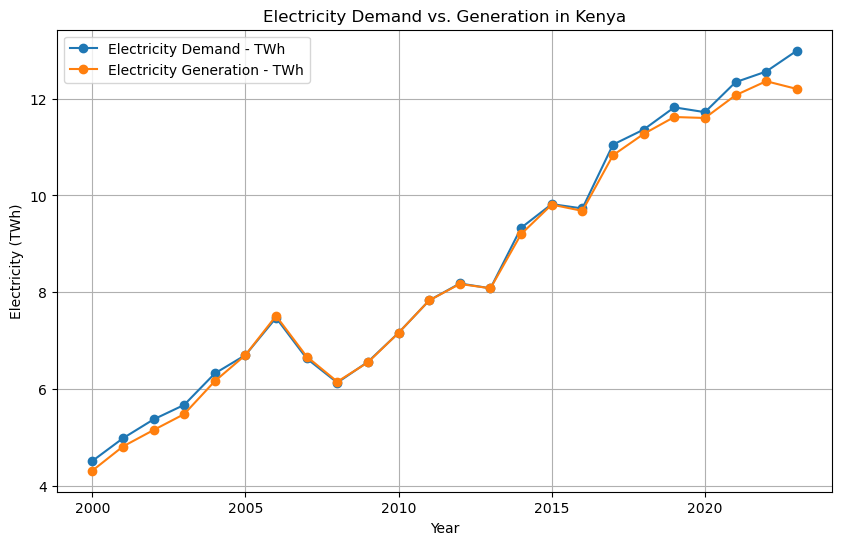

In [8]:
# Visualize Kenya's electricity demand and generation

import matplotlib.pyplot as plt

# Plotting the line graph
plt.figure(figsize=(10, 6))
plt.plot(electricity_df['Year'], electricity_df['Electricity demand - TWh'], label='Electricity Demand - TWh', marker='o')
plt.plot(electricity_df['Year'], electricity_df['Electricity generation - TWh'], label='Electricity Generation - TWh', marker='o')


plt.xlabel('Year')
plt.ylabel('Electricity (TWh)')
plt.title('Electricity Demand vs. Generation in Kenya')
plt.legend()
plt.grid(True)

plt.show()

**2. Data Extraction and Visualization: Renewable Potential**

*a. Wind Potential*

In [ ]:
import rasterio

file_path = r'C:\Users\pc\Documents\Projects\Energy-Access-and-Electrification-planning\data\renewable_potential_data\kenya_renewable_data\kenya_wind-speed_100m.tif'

# Open the .tif file using rasterio
with rasterio.open(file_path) as src:
    raster_data = src.read(1)  # Read the first band
    profile = src.profile     # Get metadata for the file

profile

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4149, 'height': 3806, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.002500000000000124, 0.0, 33.906572682195275,
       0.0, -0.002500000000000124, 4.623268747733392), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'deflate', 'interleave': 'band'}

In [10]:
import numpy as np
# Get NoData value from the metadata
nodata_value = profile.get('nodata', -9999)

# Find and count NoData values in the array
nodata_count = np.sum(raster_data == nodata_value)
print(f"NoData values count: {nodata_count}")

NoData values count: 0


In [11]:
# Open the TIFF file
with rasterio.open(r'C:\Users\pc\Documents\Projects\Energy-Access-and-Electrification-planning\data\renewable_potential_data\kenya_renewable_data\kenya_wind-speed_100m.tif') as src:
    # Print metadata
    print("Metadata:", src.meta)
    
    # Print dimensions (height and width) and number of bands
    print("Dimensions (Height x Width):", src.height, "x", src.width)
    print("Number of Bands:", src.count)
    
    # Print coordinate reference system (CRS)
    print("Coordinate Reference System (CRS):", src.crs)
    
    # Print affine transformation (mapping coordinates to array indices)
    print("Affine Transformation:", src.transform)

    # Read the first band and print a portion of pixel values as an example
    band1 = src.read(1)  # Read the first band
    print("Sample Pixel Values (Top-left corner):\n", band1[:5, :5])

Metadata: {'driver': 'GTiff', 'dtype': 'float32', 'nodata': nan, 'width': 4149, 'height': 3806, 'count': 1, 'crs': CRS.from_wkt('GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]'), 'transform': Affine(0.002500000000000124, 0.0, 33.906572682195275,
       0.0, -0.002500000000000124, 4.623268747733392)}
Dimensions (Height x Width): 3806 x 4149
Number of Bands: 1
Coordinate Reference System (CRS): GEOGCS["WGS 84",DATUM["World Geodetic System 1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST]]
Affine Transformation: | 0.00, 0.00, 33.91|
| 0.00,-0.00, 4.62|
| 0.00, 0.00, 1.00|
Sample Pixel Values (Top-left corner):
 [[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan na

In [12]:
# Check the no data value
no_data_value = src.nodata

# Create a mask for the no data values
masked_data = np.ma.masked_equal(raster_data, no_data_value)

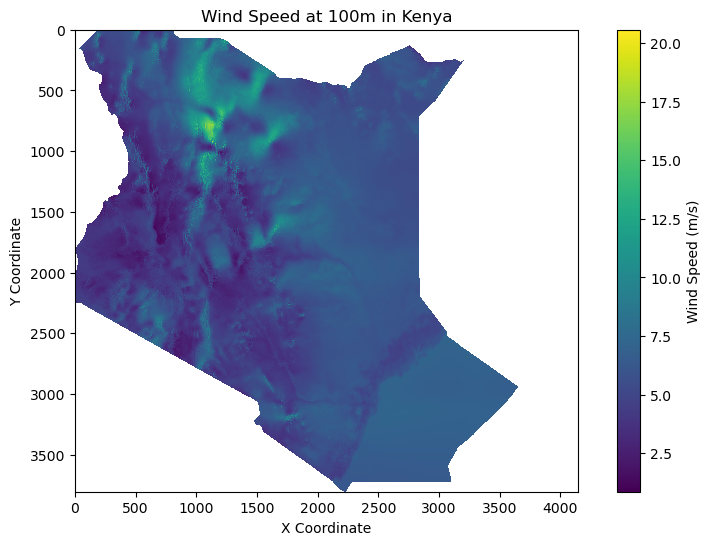

In [14]:
plt.figure(figsize=(10, 6))
plt.title('Wind Speed at 100m in Kenya')
plt.imshow(masked_data, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Wind Speed (m/s)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(False)
plt.show()

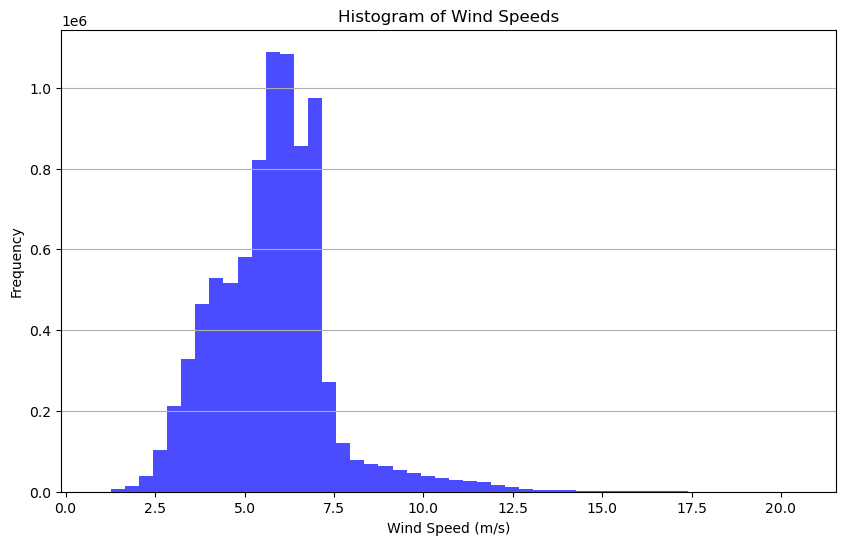

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(masked_data.compressed(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Wind Speeds')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

Identify areas with high average wind speeds, which may be potential sites for wind energy development:

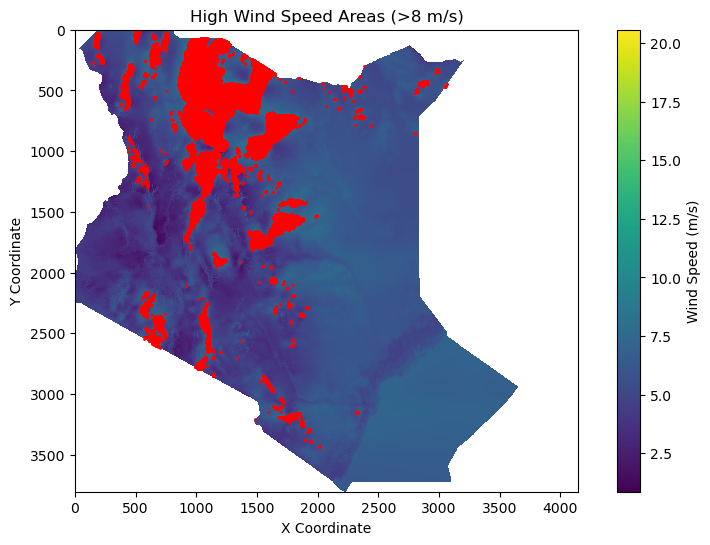

In [18]:
# Define a threshold for high wind speed
high_wind_threshold = 8  # m/s, adjust based on your criteria
high_wind_areas = np.where(masked_data > high_wind_threshold)

# Plot high wind areas
plt.figure(figsize=(10, 6))
plt.imshow(masked_data, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Wind Speed (m/s)')
plt.scatter(high_wind_areas[1], high_wind_areas[0], color='red', s=1)  # s is the size of points
plt.title('High Wind Speed Areas (>8 m/s)')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.grid(False)
plt.show()

In [19]:
# Load the wind TIFF file
wind_speed = r'C:\Users\pc\Documents\Projects\Energy-Access-and-Electrification-planning\data\renewable_potential_data\kenya_renewable_data\kenya_wind-speed_100m.tif'

with rasterio.open(wind_speed) as src:
    # Read the wind speed data from the first band
    wind_data = src.read(1)
    transform = src.transform

# List to store latitude, longitude, and wind speed values
data = []

# Loop over each pixel
for row in range(wind_data.shape[0]):
    for col in range(wind_data.shape[1]):
        # Convert row, col to latitude, longitude
        lon, lat = rasterio.transform.xy(transform, row, col)
        wind_speed = wind_data[row, col]

        # Append to data list if wind speed is valid (not a nodata value)
        if not np.isnan(wind_speed):
            data.append({'Latitude': lat, 'Longitude': lon, 'Wind Speed': wind_speed})

wind_speed_df = pd.DataFrame(data)
print(wind_speed_df)

         Latitude  Longitude  Wind Speed
0        4.622019  35.915323    6.276936
1        4.622019  35.917823    6.260634
2        4.622019  35.920323    6.232945
3        4.622019  35.922823    6.241162
4        4.622019  35.925323    6.216225
...           ...        ...         ...
8538058 -4.887981  39.480323    6.142080
8538059 -4.890481  39.472823    6.143734
8538060 -4.890481  39.475323    6.142651
8538061 -4.890481  39.477823    6.141578
8538062 -4.890481  39.480323    6.140533

[8538063 rows x 3 columns]


*b. Photovoltaic Potential*

**3. Data Extraction & Visualization: Kenya's Population Density**